**Inspired by [Aladdin Persson's](https://github.com/aladdinpersson/Machine-Learning-Collection) repository**

# Intersection Over Union (IoU)


## **IoU** $= \frac{|Pred_{bbox} \cap True_{bbox}|}{|Pred_{bbox} \cup True_{bbox}|}$

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
from intersection_over_union import iou

In [2]:
file_path = './dataset/image_1.jpg'
image_1 = Image.open(file_path).convert('RGB')

In [3]:
predicted_bboxes = [130, 20, 340, 220, 0.8]
ground_truth = [150, 35, 380, 255]
value, bbox = iou(predicted_bboxes, ground_truth)
value, bbox

(0.6118363794497504, (150, 35, 340, 220))

In [4]:
def plot_image(image, predicted, ground_truth, intersection, iou):
    
    plt.figure(figsize=(12,8))
    plt.imshow(image)
    ax = plt.gca()  
    ax.add_patch(plt.Rectangle(predicted[:2], predicted[2]-predicted[0],  predicted[3]-predicted[1], color='r', linewidth=3, alpha=0.2))
    ax.add_patch(plt.Rectangle(ground_truth[:2], ground_truth[2]-ground_truth[0], ground_truth[3]-ground_truth[1], color='b', linewidth=3, alpha=0.2))
    ax.add_patch(plt.Rectangle(intersection[:2], intersection[2]-intersection[0], intersection[3]-intersection[1], color='y', fill=True, linewidth=3, alpha=0.2, hatch='///'))
    ax.text(predicted[0]+3, predicted[1]-6, str(predicted[-1]), fontsize=15, bbox=dict(facecolor='r', alpha=0.2), color='white')
    
    iou_legend = patches.Patch(color='y', label='IoU: {:.2f}'.format(iou), alpha=0.6)
    predicted_legend = patches.Patch(color='r', label='Predicted', alpha=0.2)
    gt_legend = patches.Patch(color='b', label='Ground Truth', alpha=0.2)
    plt.legend(handles=[iou_legend, predicted_legend, gt_legend])
    plt.axis('off')
    plt.show()
    

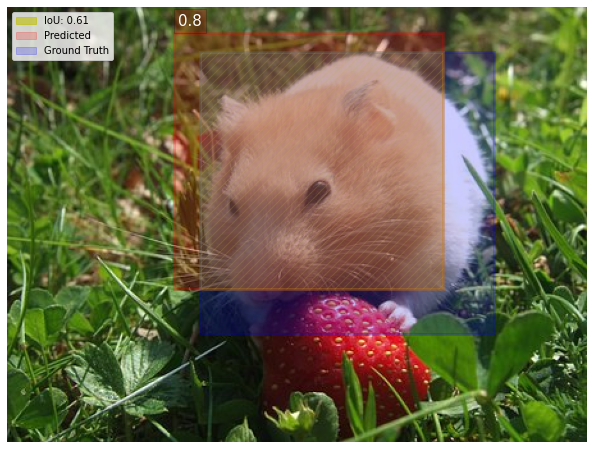

In [5]:
plot_image(image_1, predicted_bboxes, ground_truth, bbox, value)

# Non Max Suppression

In [6]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
from intersection_over_union import iou
from non_max_suppression import nms

In [7]:
file_path = './dataset/image_2.jpg'
image_2 = Image.open(file_path).convert('RGB')

In [8]:
# predictes_bboxes (list): [class_idx, probability, x1, y1, x2, y2]
predicted_bboxes = [[0, 0.6, 250, 20, 440, 320], [0, 0.95, 190, 100, 480, 380], [0, 0.3, 160, 50, 380, 200]]

In [9]:
def plot_image(image, bboxes):
    
    f = plt.figure(figsize=(14,10))
    f.add_subplot(1, 2, 1)
    plt.imshow(image)
    ax = plt.gca()
    for predicted in bboxes:
        ax.add_patch(plt.Rectangle(predicted[2:], predicted[4]-predicted[2],  predicted[5]-predicted[3], color='r', fill=False, linewidth=3))
        ax.text(predicted[2]+3, predicted[3]-6, str(predicted[1]), fontsize=15, bbox=dict(facecolor='r'), color='white')
    
    plt.axis('off')
    
    nms_bboxes = nms(bboxes=bboxes, prob_threshold=0.5, iou_threshold=0.5)
    
    f.add_subplot(1, 2, 2)
    plt.imshow(image)
    ax = plt.gca()
    for predicted in nms_bboxes:
        ax.add_patch(plt.Rectangle(predicted[2:], predicted[4]-predicted[2],  predicted[5]-predicted[3], color='r', fill=False, linewidth=3))
        ax.text(predicted[2]+3, predicted[3]-6, str(predicted[1]), fontsize=15, bbox=dict(facecolor='r'), color='white')
    plt.axis('off')
    plt.show()

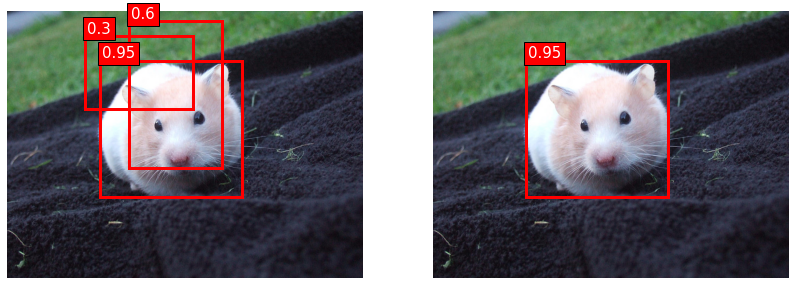

In [10]:
plot_image(image_2, predicted_bboxes)

# Mean Average Precision (mAP)

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
from intersection_over_union import iou
from mean_average_precision import mAP

In [2]:
file_path = './dataset/'
image_1 = Image.open(file_path + 'image_1.jpg').convert('RGB')
image_2 = Image.open(file_path + 'image_2.jpg').convert('RGB')
images = [image_1, image_2]

In [11]:
predicted = [[1, 0, 0.7, 100, 50, 300, 200], [2, 0, 0.8, 200, 70, 500, 320]]
labels = [[1, 0, 1.0, 150, 35, 375, 270], [2, 0, 1.0, 190, 100, 480, 380]]

In [12]:
def plot_bboxes(images, bboxes, labels):
    
    f = plt.figure(figsize=(14,10))
    f.add_subplot(1, 2, 1)
    plt.imshow(images[0])
    ax = plt.gca()
    for predicted in bboxes:
        if predicted[0] == 1:
            ax.add_patch(plt.Rectangle(predicted[3:], predicted[5]-predicted[3],  predicted[6]-predicted[4], color='r', fill=False, linewidth=3))
            ax.text(predicted[3]+3, predicted[4]-6, str(predicted[2]), fontsize=15, bbox=dict(facecolor='r'), color='white')
    for label in labels:
        if label[0] == 1:
            ax.add_patch(plt.Rectangle(label[3:], label[5]-label[3],  label[6]-label[4], color='g', fill=False, linewidth=3))
            ax.text(label[3]+3, label[4]-6, str(label[2]), fontsize=15, bbox=dict(facecolor='g'), color='white')
    
    plt.axis('off')
    
    f.add_subplot(1, 2, 2)
    plt.imshow(images[1])
    ax = plt.gca()
    for predicted in bboxes:
        if predicted[0] == 2:
            ax.add_patch(plt.Rectangle(predicted[3:], predicted[5]-predicted[3],  predicted[6]-predicted[4], color='r', fill=False, linewidth=3))
            ax.text(predicted[3]+3, predicted[4]-6, str(predicted[2]), fontsize=15, bbox=dict(facecolor='r'), color='white')
    for label in labels:
        if label[0] == 2:
            ax.add_patch(plt.Rectangle(label[3:], label[5]-label[3],  label[6]-label[4], color='g', fill=False, linewidth=3))
            ax.text(label[3]+3, label[4]-6, str(label[2]), fontsize=15, bbox=dict(facecolor='g'), color='white')
    
    plt.axis('off')
    
    plt.show()

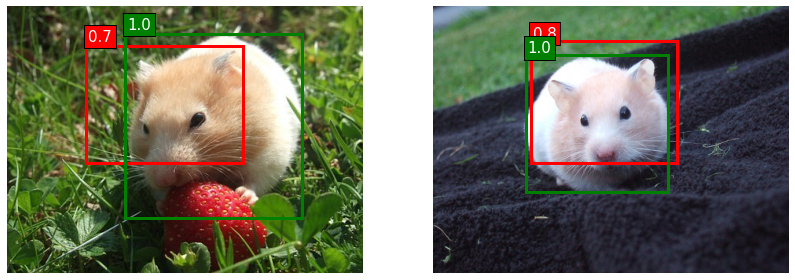

In [9]:
plot_bboxes(images, predicted, labels)

In [13]:
mAP(predicted, labels)

0.4999950000499995